## Pre processamento da serie temporal 01 - cotacao do dolar
### Transformacao da serie para estacionaria

In [114]:
import pandas as pd
import numpy as np

# imports de modulos que estao definidos dentro do projeto
import data
import timeseries
import arima

import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df_daily = data.load_timeseries01_daily()
#timeseries.plot_timeserie(df_daily)

In [116]:
df_monthly = data.load_timeseries01_monthly()
#timeseries.plot_timeserie(df_monthly)

### Transformacao da serie temporal DIARIA

In [117]:
log_df_daily = np.log(df_daily)
#timeseries.plot_timeserie(log_df_daily)

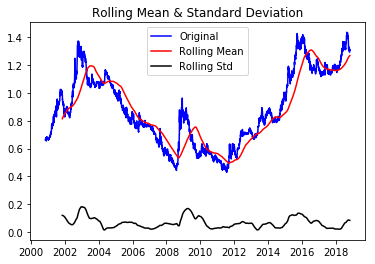

Results of Dickey-Fuller Test:
Test Statistic (-1.128302) > Critical Value 1 (-3.431348)
Test Statistic (-1.128302) > Critical Value 5 (-2.861981)
Test Statistic (-1.128302) > Critical Value 10 (-2.567005)
p-value (0.703655) > 0.05


In [118]:
timeseries.check_stationarity(log_df_daily, window=365)

In [119]:
log_df_daily_diff = log_df_daily - log_df_daily.shift()
log_df_daily_diff.dropna(inplace=True)
#timeseries.plot_timeserie(log_df_daily_diff)

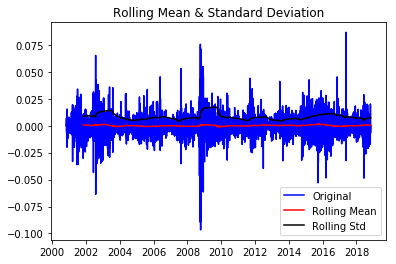

Results of Dickey-Fuller Test:
Test Statistic (-15.399245) < Critical Value 1 (-3.431348)
Test Statistic (-15.399245) < Critical Value 5 (-2.861981)
Test Statistic (-15.399245) < Critical Value 10 (-2.567005)
p-value (0.000000) < 0.05


In [120]:
timeseries.check_stationarity(log_df_daily_diff, window=365)

### Transformacao da serie temporal MENSAL

In [121]:
log_df_monthly = np.log(df_monthly)
#timeseries.plot_timeserie(log_df_monthly)

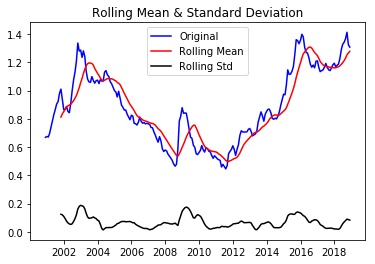

Results of Dickey-Fuller Test:
Test Statistic (-1.431590) > Critical Value 1 (-3.461136)
Test Statistic (-1.431590) > Critical Value 5 (-2.875079)
Test Statistic (-1.431590) > Critical Value 10 (-2.573986)
p-value (0.567042) > 0.05


In [122]:
timeseries.check_stationarity(log_df_monthly, window=12)

In [123]:
log_df_monthly_diff = log_df_monthly - log_df_monthly.shift()
log_df_monthly_diff.dropna(inplace=True)
#timeseries.plot_timeserie(log_df_monthly_diff)

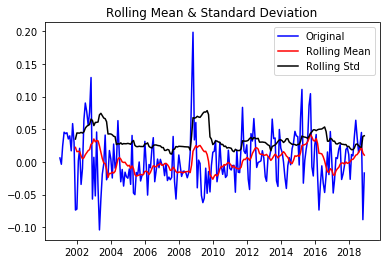

Results of Dickey-Fuller Test:
Test Statistic (-9.652797) < Critical Value 1 (-3.461136)
Test Statistic (-9.652797) < Critical Value 5 (-2.875079)
Test Statistic (-9.652797) < Critical Value 10 (-2.573986)
p-value (0.000000) < 0.05


In [124]:
timeseries.check_stationarity(log_df_monthly_diff, window=12)

### Grid Search para o ARIMA aplicado na serie temporal DIARIA

### Grid Search para o ARIMA aplicado na serie temporal MENSAL

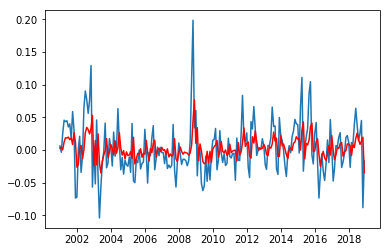

In [125]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA model
model = ARIMA(log_df_monthly, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)

plt.plot(log_df_monthly_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - log_df_monthly_diff.values)**2))

SHAPE: (217,)

DTYPES: object

##########################################################################################
HEAD 

date
2000-11-30    [1.9515964285714291]
2000-12-31     [1.963548387096774]
2001-01-31    [1.9566612903225806]
2001-02-28    [2.0052499999999998]
2001-03-31     [2.098596774193548]
Freq: M, dtype: object


##########################################################################################
TAIL 

date
2018-07-31     [3.823541935483871]
2018-08-31    [3.9247290322580652]
2018-09-30     [4.105923333333333]
2018-10-31    [3.7588741935483885]
2018-11-30                [3.6957]
Freq: M, dtype: object


TypeError: only size-1 arrays can be converted to Python scalars

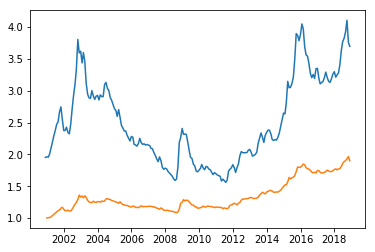

In [148]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#print(predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(log_df_monthly.iloc[0], index=log_df_monthly.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
#print(df_monthly.values.tolist())
t = pd.Series(data=df_monthly.values.tolist(), index=df_monthly.index, copy=True)
arima.print_dataframe_info(t)

plt.plot(df_monthly)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA.values - df_monthly.values)**2)/len(df_monthly.values)))